<a href="https://colab.research.google.com/github/yardenzaki/robotics-summary/blob/main/Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Useful links

* issac gym 
 
   https://github.com/iamlab-cmu/isaacgym-utils/tree/master/examples

  https://github.com/cypypccpy/Isaac-ManipulaRL/tree/master/envs_test

* Manipulator kinematics

  https://github.com/jhavl/dkt

* ChatGPT

  https://chat.openai.com/chat

* Torch

  https://pytorch.org/docs/stable/torch.html

  * Torch optimization

  https://pytorch.org/docs/stable/optim.html#how-to-use-an-optimizer

  * Torch CheatSheet

  https://pytorch.org/tutorials/beginner/ptcheat.html#tensors

  * RL - Cartpole - Pytorch optimization

  https://pytorch.org/tutorials/intermediate/reinforcement_q_learning.html

# Robotics Principals

## Tensor Shapes

For a robotic manipulator with N degrees of freedom, the shapes of the kinematic and state tensors are as follows:

* q , q̇ , q̈ = (N,1) - state vectors of manipulator dofs
* T = (4,4) - Tr matrices
* R = (3,3) - Rotation matrices
* J = (6,N) - containing the Jacobian matrix of the manipulator. The first three rows of the Jacobian (Jv) correspond to the translational velocities of the end-effector in x, y, and z directions, and the last three rows (Jw) correspond to the rotational velocities around x, y, and z axes.
* p = (3,1) - the ee position with respect to the base frame
* euler = (3,1) - representing the Euler angles (roll, pitch, and yaw) that describe the orientation of the end-effector with respect to the base frame.

## DH Parameters

* To find the Denavit-Hartenberg (DH) parameters of a manipulator, you need to follow these steps:

Label the joints of the manipulator from 1 to n, where n is the number of joints.
Choose a reference frame for the manipulator. This frame is usually located at the base of the robot and has the same orientation as the world frame.
Define the joint axes of the manipulator. Each joint has an axis of rotation that defines its motion.
Assign the reference frame to joint 1 and define its z-axis as the joint axis.
For each subsequent joint, define a new reference frame that is located at the joint and has the same orientation as the previous reference frame. The x-axis of the new frame should be perpendicular to the z-axis of the previous frame and point towards the next joint axis. The z-axis of the new frame should be aligned with the joint axis.
Choose a convenient origin for each new reference frame.
Define the DH parameters for each joint, using the following convention:
* a:  the distance from the z-axis of the previous frame to the intersection of the x-axis of the current frame with the z-axis of the previous frame.
* alpha:  the angle between the z-axes of the previous frame and the current frame, measured about the x-axis of the current frame.
* d:  the distance from the x-axis of the previous frame to the intersection of the z-axis of the current frame with the x-axis of the previous frame.
* theta:  the angle between the x-axes of the previous frame and the current frame, measured about the z-axis of the current frame.
Here's an example DH parameter table for a 2DOF manipulator with revolute joints:


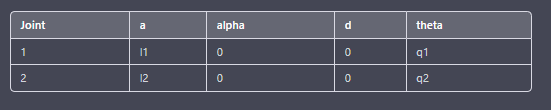



In this example, l1 and l2 are the link lengths of the manipulator, and q1 and q2 are the joint angles.

Once you have the DH parameters, you can use them to compute the forward kinematics of the manipulator, which gives you the position and orientation of the end-effector given the joint angles. **You can also use them to compute the Jacobian of the manipulator, which relates the joint velocities to the end-effector velocity.**

### Jacobian from DH parameters

** More here including how to implement: [The manipulator jacobian](https://colab.research.google.com/github/jhavl/dkt/blob/main/Part%201/2%20The%20Manipulator%20Jacobian.ipynb#scrollTo=URtvVzV4AUUC)

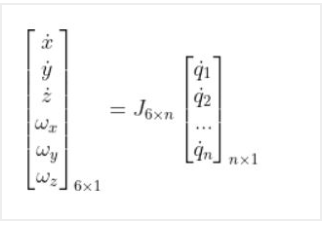

* **The Jacobian matrix is a 6 x n matrix (n - num of joints)**

* The Jacobian is a matrix that relates the joint velocities of a manipulator to the end-effector velocity. It can be used to calculate the linear and angular velocities of the end-effector given the joint velocities. The Jacobian is an important tool in robotic control and is used in tasks such as inverse kinematics, trajectory planning, and force control.

To compute the Jacobian of a manipulator given its DH parameters, you can follow these steps:

1. Calculate the transformation matrices between each frame and the base frame using the DH parameters and the current joint angles.
2. Calculate the positions of each frame and the end-effector using the transformation matrices.
3. Calculate the partial derivatives of the end-effector position with respect to each joint angle.
4. Calculate the partial derivatives of the end-effector orientation with respect to each joint angle.
5. Assemble the partial derivatives into a Jacobian matrix.

## Forward Kinematics
 * To calculate the forward kinematics of a manipulator given its DH parameters, you can follow these steps:

Define the transformation matrices between adjacent frames using the DH parameters.
Multiply the transformation matrices together to get the homogeneous transformation matrix from the base frame to the end-effector frame.
Extract the position and orientation of the end-effector from the homogeneous transformation matrix.
Here's some sample code in Python that implements these steps:

In [97]:
import numpy as np

def forward_kinematics(q, DH_params):
    """
    Calculates the forward kinematics of a manipulator given its DH parameters and joint angles.
    :param q: array of joint angles in radians
    :param DH_params: array of DH parameters [a, alpha, d, theta] for each joint
    :return: homogeneous transformation matrix from the base frame to the end-effector frame
    """
    # Define the transformation matrices between adjacent frames using the DH parameters
    T_list = []
    for i in range(len(q)):
        a, alpha, d, theta = DH_params[i]
        T = np.array([[np.cos(q[i]), -np.sin(q[i]) * np.cos(alpha),  np.sin(q[i]) * np.sin(alpha), a * np.cos(q[i])],
                      [np.sin(q[i]),  np.cos(q[i]) * np.cos(alpha), -np.cos(q[i]) * np.sin(alpha), a * np.sin(q[i])],
                      [0,             np.sin(alpha),                  np.cos(alpha),                 d            ],
                      [0,             0,                             0,                            1            ]])
        T_list.append(T)

    # Multiply the transformation matrices together to get the homogeneous transformation matrix from the base frame to the end-effector frame
    T_0n = np.eye(4)
    for T in T_list:
        T_0n = T_0n.dot(T)

    # Extract the position and orientation of the end-effector from the homogeneous transformation matrix
    R = T_0n[:3, :3]
    p = T_0n[:3, 3]

    return T_0n


## IK

 * [The Ultimate Guide to Inverse Kinematics for 6DOF Robot Arms](https://automaticaddison.com/the-ultimate-guide-to-inverse-kinematics-for-6dof-robot-arms/#Real-World_Applications)

* [Numerical Inverse Kinematics](https://colab.research.google.com/github/jhavl/dkt/blob/main/Part%201/4%20Numerical%20Inverse%20Kinematics.ipynb#scrollTo=mg_8anKTIafy)

* [Advanced Numerical Inverse Kinematics](https://colab.research.google.com/github/jhavl/dkt/blob/main/Part%202/6%20Advanced%20Numerical%20Inverse%20Kinematics.ipynb#scrollTo=gj_0nqIXKCSl)


* Each method seeks to minimise the error function

\begin{align*}
    E = \frac{1}{2} \bf{e}^{\top} \bf{W}_e \bf{e}
\end{align*}

where $\bf{e} \in \mathbb{R}^6$ is the position and angle-axis error vector (see Notebook 3), and $\bf{W}_e = \text{diag}(\bf{w_e})(\bf{w_e} \in \mathbb{R}^n_{\geq0})$ is a diagonal weighting matrix which prioritises the corresponding error term. The `IK` class below takes a `we` vector in the `init` method and calculates the error vector `e` and quadratic error term `E` through the `error` method.





# Control Theorem

## sensing simulation
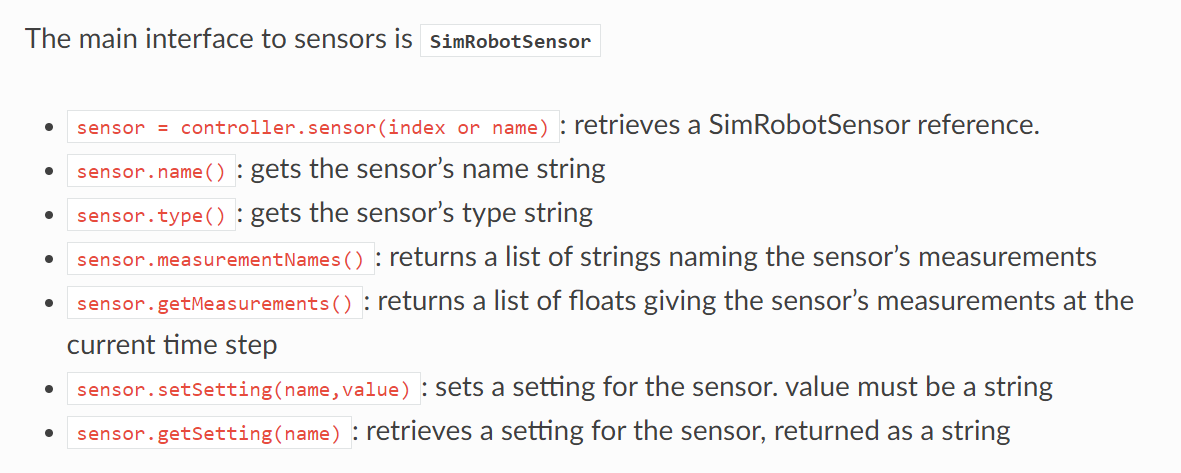

## PID implementation

** PIDController: 

  :input: 
  
  current pos , desired pos

  :calculates:
  
   error term, the control signal which is kp * error + ki * integral + kd * derivative

   :output:

   control signal X -  "go to current pos + X"

1. initialize controller parameters:
  * kp , ki , kd
  * desired end point (setpoint)
  * last_error =0
  * integral_of_error =0
2. During a control loop, the controller gets "current measurement" and updating (with method) its output:
  * error = setpoint - current
  * error_deriv = error - last_error
  * integral_of_error = integral_of_error + error
  * The output is then: self.kp * error + self.ki * self.integral + self.kd * derivative
  * and before returning the controller ouput we update last_error to be equal to current error

3. During simulation the following happens:
  * sensor is used to get the current measurment
  * the controller is fed by this signal and returns output 
  * the motors are getting a control command to move to (current_pos + pid_output) - this could be implemented with IK

In [ ]:
import time
import matplotlib.pyplot as plt

class PIDController:
    def __init__(self, kp, ki, kd, setpoint):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.setpoint = setpoint
        self.last_error = 0
        self.integral = 0

    def update(self, measurement):
        error = self.setpoint - measurement
        derivative = error - self.last_error
        self.integral += error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.last_error = error
        return output

class RobotArm:
    def __init__(self, initial_position):
        self.position = initial_position

        #for plotting
        self.counter=0
        self.count_lst=[]
        self.pos_lst=[]
        # Create a figure and axis object
        fig, self.ax = plt.subplots()
        self.line, = self.ax.plot(self.count_lst, self.pos_lst, linestyle="-.", marker="*", color="k")


    def move_to(self, position,plotting=False):
        print("Moving arm to position:", position)
        self.position = position

        if plotting:
          # for plotting
          self.plotter()

    def get_position(self):
        return self.position
    
    def plotter(self):
        # Update the line object with the new data
        # self.line.set_xdata(self.count_lst)
        # self.line.set_ydata(self.pos_lst)
        self.line, = self.ax.plot(self.count_lst, self.pos_lst, linestyle="-.", marker="*", color="k")
        # Redraw the plot
        plt.draw()
        plt.pause(0.01)

class PositionSensor:
    def __init__(self, noise=0):
        self.noise = noise

    def measure(self, robot_arm):
        return robot_arm.get_position() + self.noise

# PID Controller Parameters
kp = 0.5
ki = 0.1
kd = 0.05

# Robot Arm Parameters
initial_position = 0
desired_position = 10

# Create objects
pid_controller = PIDController(kp, ki, kd, desired_position)
robot_arm = RobotArm(initial_position)
position_sensor = PositionSensor(noise=0.5)

# Move arm to desired position
i=0
while i<100:
    i=i+1
    measurement = position_sensor.measure(robot_arm)
    output = pid_controller.update(measurement)
    robot_arm.move_to(robot_arm.get_position() + output,plotting=True)
    time.sleep(0.1)



In [2]:
import numpy as np

class Motor:
    def __init__(self, initial_position=0, max_position=180, min_position=0):
        self.position = initial_position
        self.max_position = max_position
        self.min_position = min_position

    def move(self, angle):
        new_position = self.position + angle
        if new_position > self.max_position:
            self.position = self.max_position
        elif new_position < self.min_position:
            self.position = self.min_position
        else:
            self.position = new_position

    def get_position(self):
        return self.position

class PIDController:
    def __init__(self, Kp, Ki, Kd):
        self.Kp = Kp
        self.Ki = Ki
        self.Kd = Kd
        self.error_integral = 0
        self.error_previous = 0

    def update(self, setpoint, feedback):
        error = setpoint - feedback
        self.error_integral += error
        error_derivative = error - self.error_previous
        self.error_previous = error
        control_signal = (self.Kp * error) + (self.Ki * self.error_integral) + (self.Kd * error_derivative)
        return control_signal



# Example usage
pid_controller = PIDController(Kp=0.5, Ki=0.05, Kd=0.05)
feedback = 30 #current feedback

robot_motor = Motor(initial_position=feedback)
setpoint = 10 #desired setpoint

control_signal=1000
epsilon = 0.000000001
max_iter = 10000
i=0

while abs(control_signal) > epsilon:
  i+=1
  control_signal = pid_controller.update(setpoint, feedback)
  #move poisition of motor:
  robot_motor.move(control_signal)
  #update fisback
  feedback = robot_motor.get_position()

  if i>max_iter:
    print(f"exceeded {max_iter=}")

print(f"Control signal: {control_signal}\n  current motor position: {robot_motor.get_position()}\n iter {i}\n  error: integral={pid_controller.error_integral} , prev ={pid_controller.error_previous}\n")


Control signal: 9.122482325096824e-10
  current motor position: 9.999999993140406
 iter 167
  error: integral=-5.843988759579588e-08 , prev =7.771841836756721e-09



### PID PROS AND CONS


Pros of PID Controllers:

1. Simple: PID controllers are relatively simple to implement and tune, since they require only a few parameters (proportional, integral, and derivative gains).
2. Widely used: PID controllers are widely used in a variety of applications, including process control, robotics, and automation.
3. Effective for linear systems: PID controllers are effective for linear systems, since they can model the behavior of linear systems accurately.


Cons of PID Controllers:

1. Less effective for non-linear systems: PID controllers can be less effective for non-linear systems, since they may not be able to model the behavior of the system accurately.
2. Poor at handling disturbances: PID controllers can be poor at handling disturbances, since they may not be able to adjust their behavior in real time to compensate for changes in the system.
3. Limited flexibility: PID controllers are less flexible than impedance controllers, since they are designed primarily for controlling linear systems.


## Impedance Control implementation

"
Impedance control is a control technique that allows a robotic system to interact with its environment in a way that emulates the behavior of a mechanical spring and damper. The basic idea is to adjust the impedance (i.e., the resistance to motion) of the robotic system based on the force and position of the interaction with the environment."

* 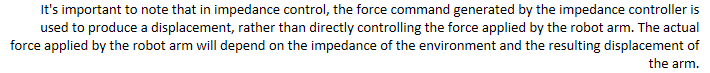



1. initialize controller parameters:
  * stiffness , damping
  * desired position and velocity 
  * current position and velocity = 0
  * current force = 0

2. During a control loop, the controller gets "current pos measurement" + "current force"  and updating (with method) its output:
  * pos_error = setpoint - current_pos
  * vel_error = desired_vel - current_vel
  * The output is then:  stiffness * error + damping * velocity_error - current_force
  * and before returning the controller ouput we update current_velocity += output

3. During simulation the following happens:
  * sensors are used to get the current pos + force
  * the controller is fed by those and returns output (control command) 
  * the motors are getting a control command to move to (current_pos + impedance_output) - this could be implemented with IK


In [ ]:
import numpy as np
import time

class ImpedanceController:
    def __init__(self, stiffness, damping):
        self.stiffness = stiffness
        self.damping = damping
        self.desired_position = 0
        self.current_position = 0
        self.current_velocity = 0
        self.current_force = 0

    def update(self, measurement, force):
        self.current_position = measurement
        self.current_force = force
        error = self.desired_position - self.current_position
        velocity_error = 0 - self.current_velocity
        force_command = self.stiffness * error + self.damping * velocity_error - self.current_force
        self.current_velocity += force_command
        return force_command

class RobotArm:
    def __init__(self, initial_position):
        self.position = initial_position

    def move_to(self, position):
        print("Moving arm to position:", position)
        self.position = position

    def get_position(self):
        return self.position

class ForceSensor:
    def __init__(self, noise=0):
        self.noise = noise

    def measure(self):
        return np.random.normal(0, self.noise)

# Impedance Controller Parameters
stiffness = 1
damping = 0.1*5

# Robot Arm Parameters
initial_position = 0

# Create objects
impedance_controller = ImpedanceController(stiffness, damping)
robot_arm = RobotArm(initial_position)
force_sensor = ForceSensor(noise=0.1)

# Interact with environment using impedance control
i=0
while i<100:
    i=i+1
    measurement = robot_arm.get_position()
    force = force_sensor.measure()
    force_command = impedance_controller.update(measurement, force)
    robot_arm.move_to(robot_arm.get_position() + force_command)
    time.sleep(0.1)


In [ ]:
import numpy as np
from scipy import stats

class ForceSensor:
    """
    Attr:
    * self.offset - value of the sensor reading when no force is applied
    * self.sensitivity - slope of the calibration curve which
      represents the change in sensor output per unit change in actual force.
    * self.sampling_rate - sampling rate of sensor [Hz]
    * sampling.period - sampling over T [sec]
    * self.min_force - nominal min force to sense [N]
    * self.max_force - nominal max force to sense [N]
    * self.min_ADC_reading - analog-to-digital converter (ADC) that produces a digital output in the range of ...
    * self.max_ADC_reading - analog-to-digital converter (ADC) that produces a digital output in the range of
    * self.actual_force - actual force [N]

    methods:
    * make_calibration_table - mapping actual force to ADC sensor readings - implemented with random
    * sample_from_sensor (raw voltage data + noise) , integrating over sampling period
    * get_actual_forces (mapping voltage into forces)

    """
    def __init__(self,min_ADC_reading=0 ,max_ADC_reading=1023, 
                 sampling_rate=1000,period=0.5,min_force=0,max_force=100,current_force_reading = 0
                 ):
      

        self.offset = None
        self.sensitivity = None
        self.min_ADC_reading=min_ADC_reading
        self.max_ADC_reading=max_ADC_reading
        self.sampling_rate=sampling_rate
        self.period=period
        self.min_force=min_force
        self.max_force=max_force
        self.current_force_reading=current_force_reading
        self.prvs_force_reading = current_force_reading

    def make_calibration_table(self):
      self.rand_offset = np.random.randint(100, size=1)
      self.rand_sens = np.random.randint(100, size=1)
      self.force_array = np.sort(np.random.choice(np.arange(self.min_force, self.max_force+1),
                                           replace=False, size=(10)))
      
      self.ADC_array = self.rand_sens * self.force_array + self.rand_offset
      
      self.sensitivity, self.offset, _, _, _ = stats.linregress(self.force_array,self.ADC_array)




    def _get_actual_force(self):
      self.actual_force =np.random.choice((-1, 1)) *  (self.sensor_reading-self.offset)/self.sensitivity

    def sample_from_sensor(self,e):
       # sample during sampling time

      #Noise amplitude e
       
       ## assuming sensor reading withina range:
       rand_reading_val = np.random.choice(np.arange(self.min_ADC_reading+e, self.max_ADC_reading+1-e), size=(1))
       #N
       N = int(self.sampling_rate*self.period)

       #sampling
       rand_reading_val = np.random.uniform(rand_reading_val-e,rand_reading_val+e,[N])

       self.sensor_reading = np.mean(rand_reading_val)
    def update(self):
      self.actual_force =  self.prvs_force_reading + self.actual_force  
      self.prvs_force_reading = self.actual_force

    def __str__(self):
      print(f"Sampled: {self.rand_offset=} , {self.rand_sens=}\n")
      print(f"Calculated: {self.offset=} , {self.sensitivity=}\n")
      print(f"Actual Force [N],Sensor Reading (ADC)\n")
      for i,j in zip(self.force_array,self.ADC_array):
        print(f"{i},{j}\n")
      return ""
       
      
    def __call__(self,e=2):
      self.make_calibration_table()
      self.sample_from_sensor(e)
      self._get_actual_force()
      #update:
      self.update()
      
      print(f"force: {self.actual_force}N")
      return self.actual_force

  

class PositionSensor:
    def __init__(self):
        self.position = 0.0

    def read(self):
        # Read the position sensor and update the position value
        self.position = self.read_position_sensor()
        # Return the position value
        return self.position

    def read_position_sensor(self):
      signal =  rand_reading_val = np.random.choice(np.arange(10, 100), size=(1))
      return signal

class ImpedanceController:
    def __init__(self, K, B):
        self.K = K  # Spring constant
        self.B = B  # Damping constant
        self.target_force = None
        self.target_position = None
    
    def update(self, position, force, dt):
        # Calculate the error in position and force
        position_error = self.target_position - position
        force_error = self.target_force - force

        # Calculate the desired velocity and acceleration
        velocity_desired = self.K * position_error + self.B * force_error
        acceleration_desired = (velocity_desired - position_error) / dt

        # Calculate the control signal
        control_signal = self.K * position_error + self.B * velocity_desired + acceleration_desired

        # Return the control signal
        return control_signal

fs = ForceSensor(period=0.1)
ps = PositionSensor()
#print(fs.__dict__)

# Example usage
impedance_controller = ImpedanceController(K=0.5 , B=0.3)
feedback = 30 #current feedback

robot_motor = Motor(initial_position=feedback)
setpoint = 10 #desired setpoint


# Define desired target position and force
target_position = 90
target_force = 12




control_signal=1000
epsilon = 0.000000001
max_iter = 10000
i=0

while abs(control_signal) > epsilon:
  i+=1
  #read force:
  force = fs()
  #read position:
  position = ps.read()[0]

  # Set the target position and force for the impedance controller
  impedance_controller.target_force=target_force
  impedance_controller.target_position=target_position
  #print(impedance_controller.__dict__)

  # Update the control signal based on the current position and force
  dt = fs.period
  #print("position,force,dt",position,force,dt)
  control_signal = impedance_controller.update(position,force,dt)

  # Map the control signal to a motor angle
  angle = control_signal

  #move poisition of motor:
  robot_motor.move(angle)

  if i>max_iter:
    print(f"exceeded {max_iter=}")

print(f"Control signal: {control_signal}\n  current motor position: {robot_motor.get_position()}\n iter {i}\n" )


## IMPEDANCE CONTROLLER PROS AND CONS

Pros of Impedance Controllers:

1. Better at handling non-linear systems: Impedance controllers can handle non-linear systems more effectively than PID controllers, since they can model the behavior of a system more accurately.
2. More flexible: Impedance controllers are more flexible than PID controllers, since they can be used to control a wide range of systems, including robots, vehicles, and other dynamic systems.
3. Better at handling disturbances: Impedance controllers can handle disturbances more effectively than PID controllers, since they can adjust their behavior in real time to compensate for changes in the system.

Cons of Impedance Controllers:

1. More complex: Impedance controllers are more complex than PID controllers, since they require more sophisticated models of the system being controlled.
2. More difficult to tune: Impedance controllers can be more difficult to tune than PID controllers, since they require a deeper understanding of the underlying system dynamics.
3. More computationally expensive: Impedance controllers can be more computationally expensive than PID controllers, since they require more calculations to determine the appropriate control signals.

## PID vs Impedance including plotting

In [ ]:
import numpy as np
import time
import matplotlib.pyplot as plt


class PIDController:
    def __init__(self, kp, ki, kd, setpoint):
        self.kp = kp
        self.ki = ki
        self.kd = kd
        self.setpoint = setpoint
        self.last_error = 0
        self.integral = 0

    def update(self, measurement):
        error = self.setpoint - measurement
        derivative = error - self.last_error
        self.integral += error
        output = self.kp * error + self.ki * self.integral + self.kd * derivative
        self.last_error = error
        return output

class ImpedanceController:
    def __init__(self, stiffness, damping):
        self.stiffness = stiffness
        self.damping = damping
        self.desired_position = 0
        self.current_position = 0
        self.current_velocity = 0
        self.current_force = 0

    def update(self, measurement, force):
        self.current_position = measurement
        self.current_force = force
        error = self.desired_position - self.current_position
        velocity_error = 0 - self.current_velocity
        force_command = self.stiffness * error + self.damping * velocity_error - self.current_force
        self.current_velocity += force_command
        return force_command

class RobotArm:
    def __init__(self, initial_position):
        self.position = initial_position

        self.counter=0
        self.count_lst=[]
        self.pos_lst=[]
        # Create a figure and axis object
        fig, self.ax = plt.subplots()
        self.line, = self.ax.plot(self.count_lst, self.pos_lst, linestyle="-.", marker="*", color="k")



    def move_to(self, position , plotting=False):
        print("Moving arm to position:", round(position,2))
        self.pos_lst.append(position)
        self.counter += 1
        self.count_lst.append(self.counter)
        self.position = position
        if plotting:
            # for plotting
            self.plotter()


    def get_position(self):
        return self.position

    def plotter(self):
        # Update the line object with the new data
        # self.line.set_xdata(self.count_lst)
        # self.line.set_ydata(self.pos_lst)
        self.line, = self.ax.plot(self.count_lst, self.pos_lst, linestyle="-.", marker="*", color="k")
        # Redraw the plot
        plt.draw()
        plt.pause(0.01)

class ForceSensor:
    def __init__(self, noise=0):
        self.noise = noise

    def measure(self):
        return np.random.normal(0, self.noise)

class PositionSensor:
    def __init__(self, noise=0):
        self.noise = noise

    def measure(self, robot_arm):
        return robot_arm.get_position() + self.noise


# Impedance Controller Parameters
stiffness = 1
damping = 0.1

# pid controller Parameters
kp=0.5
ki=0.1
kd=0.05
setpoint=200 # desired position

# Robot Arm Parameters
initial_position = 0

# Create objects
impedance_controller = ImpedanceController(stiffness, damping)
pid_controller = PIDController(kp,ki,kd,setpoint)

robot_arm_IMP = RobotArm(initial_position)
robot_arm_PID = RobotArm(initial_position)

# sensor objects
force_sensor = ForceSensor(noise=0.1)
position_sensor = PositionSensor(noise=0.5)

# Create plt objects -  -


# Interact with environment using impedance control
i=0
while i<100:
    i=i+1
    measurement_IMP = robot_arm_IMP.get_position()
    # Impedeance Controlling
    force = force_sensor.measure()
    force_command = impedance_controller.update(measurement_IMP, force)
    print(f"Impedance Control: \n force_command={round(measurement_IMP,1)}\n")
    robot_arm_IMP.move_to(robot_arm_IMP.get_position() + force_command, plotting=True)

    measurement_PID = position_sensor.measure(robot_arm_PID)
    pid_command = pid_controller.update(measurement_PID)
    print(f"PID Control:\n pid_command={round(pid_command, 1)}\n")
    robot_arm_PID.move_to(robot_arm_PID.get_position() + pid_command, plotting=True)



    time.sleep(0.1)


# Optimization principals

# Reinforement Learining Principals

## Key definitions

**Reinforcement Learning (RL) is a type of machine learning in which an agent learns to interact with an environment to maximize a reward signal.**

1. Agent: The agent is the entity that learns to interact with the environment. The agent takes actions in the environment and receives feedback in the form of a reward signal.

2. Environment: The environment is the world in which the agent operates. The environment can be anything from a simulated game world to a physical system like a robot.

3. Policy: The policy is the strategy that the agent uses to determine its actions in the environment. The policy maps the current state of the environment to an action.

4. Reward: The reward signal is the feedback that the agent receives from the environment after taking an action. The reward signal is used to reinforce good behaviors and discourage bad behaviors.

5. Value: The value of a state or state-action pair is the expected future reward that the agent can obtain from that state or state-action pair.

6. Exploration-Exploitation: In RL, the agent must balance the exploration of new actions and the exploitation of actions that have been found to be successful in the past.

7. Reward Function: The reward function defines the goal of the agent in the RL problem. It specifies the amount of reward that the agent receives for each action taken in the environment. The reward function can be a simple scalar value or a more complex function that depends on the state of the environment and the actions taken by the agent.

8. Episode: An episode is a single run of the RL problem, starting from an initial state and ending when the goal state is reached or a maximum number of steps is reached. In some problems, the agent must perform multiple episodes to learn an optimal policy.

9. Observation: An observation is the information that the agent receives from the environment about its current state. The observation can be a simple set of variables or a more complex representation of the environment.

10. Action: An action is the output of the agent's policy function, specifying the next action to take in the environment. The action can be a discrete value, such as a choice between a set of possible actions, or a continuous value, such as a position or velocity.

11. Actor: The actor is the part of the RL system that determines the agent's policy function. In some RL algorithms, the actor is updated based on the observed rewards and the value function, with the goal of maximizing the expected future reward.

## Agent

An Agent class in Python could have the following attributes and methods:

Attributes:

1. state: The current state of the agent.
2. action_space: The set of possible actions that the agent can take.
3. policy: The function that maps states to actions.
4. reward: The total reward that the agent has received during the current episode.
5. episode: The current episode number.

Methods:

1. act(state): Given the current state, select an action based on the policy.
2. learn(state, action, reward, next_state, done): Update the policy based on the observed reward and the next state.
3. reset(): Reset the agent's state and reward for the start of a new episode.
4. run_episode(env): Run a single episode in the given environment, updating the policy based on the observed rewards and states.
5. train(env, num_episodes): Train the agent by running multiple episodes in the given environment and updating the policy based on the observed rewards and states.
6. test(env, num_episodes): Test the agent by running multiple episodes in the given environment without updating the policy.

## Enviroment

Attributes:

1. state: The current state of the environment.
2. action_space: The set of possible actions that an agent can take in the environment.
3. reward: The reward obtained by the agent for the current state and action.
4. done: A flag indicating whether the episode has ended.
5. episode_length: The maximum number of steps in each episode.
6. episode: The current episode number.

Methods:

1. reset(): Reset the environment to its initial state.
2. step(action): Given an action, update the state of the environment and return the next state, reward, done flag, and any additional information.
3. render(): Visualize the current state of the environment.
4. close(): Clean up any resources used by the environment.
5. run_episode(agent): Run a single episode with the given agent, using the step() method to update the state and reward and the render() method to visualize the state.
6. train(agent, num_episodes): Train the agent by running multiple episodes with the run_episode() method and updating the agent's policy based on the observed rewards and states.
7. test(agent, num_episodes): Test the agent by running multiple episodes with the run_episode() method without updating the agent's policy.

## Policy

Attributes:

1. state_space: The set of possible states in the environment.
1. action_space: The set of possible actions that an agent can take in the environment.
1. parameters: The parameters of the policy function.
learning_rate: The learning rate used to update the parameters.
1. optimizer: The optimization algorithm used to update the parameters.

Methods:

1. select_action(state): Given a state, select an action to take based on the policy function.
1. update(reward): Update the policy function based on the observed reward and the state transition.
1. reset(): Reset the policy function to its initial state.
1. train(agent, environment, num_episodes): Train the policy function by running multiple episodes in the given environment and updating the policy based on the observed rewards and states.
1. test(agent, environment, num_episodes): Test the policy function by running multiple episodes in the given environment without updating the policy.

## Reward Function

Attributes:

1. state_space: The set of possible states in the environment.
1. action_space: The set of possible actions that an agent can take in the environment.

Methods:

1. compute_reward(state, action, next_state): Given the current state, action, and next state, compute the reward for the agent.
1. reset(): Reset the reward function to its initial state.
1. train(agent, environment, num_episodes): Train the reward function by running multiple episodes in the given environment and updating the function based on the observed rewards and states.
1. test(agent, environment, num_episodes): Test the reward function by running multiple episodes in the given environment.

# Pytorch principals

## Algebra



```
ret = A.mm(B)       # matrix multiplication
ret = A.mv(x)       # matrix-vector multiplication
x = x.t()           # matrix transpose
```



## Optimizers




```
opt = optim.x(model.parameters(), ...)      # create optimizer
opt.step()                                  # update weights
optim.X                                     # where X is SGD, Adadelta, Adagrad, Adam,
                                            # AdamW, SparseAdam, Adamax, ASGD,
                                            # LBFGS, RMSprop or Rprop
```




## DataLoaders and DataSamplers



```
DataLoader(dataset, batch_size=1, ...)      # loads data batches agnostic
                                            # of structure of individual data points

sampler.Sampler(dataset,...)                # abstract class dealing with
                                            # ways to sample from dataset

sampler.XSampler where ...                  # Sequential, Random, SubsetRandom,
                                            # WeightedRandom, Batch, Distributed
```



## Utility functions


1. torch.Tensor:

 Creates a new tensor from an input sequence or array.

```
# Create a tensor from a list
tensor1 = torch.Tensor([1, 2, 3, 4],dtype=torch.float32, device="cpu", requires_grad=True)

# Create a tensor from a NumPy array
arr = np.array([5, 6, 7, 8])
tensor2 = torch.Tensor(arr)

# Print the shape, number of dimensions, and data type of the tensor
print("Shape:", tensor1.shape)
print("Number of dimensions:", tensor1.dim())
print("Data type:", tensor1.dtype)
print("Device:", tensor1.device)
print("Requires grad:", tensor1.requires_grad)

# OUTPUT---------
# Shape: torch.Size([4])
# Number of dimensions: 1
# Data type: torch.float32
# Device: cpu
# Requires grad: True

```




2. torch.zeros:

 Creates a new tensor filled with zeros.
3. torch.ones:

 Creates a new tensor filled with ones.
4. torch.eye:

 Creates a new tensor with diagonal elements set to 1 and all other elements set to 0.



```
# Create a tensor of zeros with a specific shape
tensor3 = torch.zeros((2, 3))

# Create a tensor of ones with a specific shape
tensor4 = torch.ones((3, 2))
```



5. torch.rand:

 Creates a new tensor with random values between 0 and 1.
6. torch.randn:

 Creates a new tensor with random values from a normal distribution with mean 0 and standard deviation 1.



```
# Some examples for Random Tensor generations:

## Random tensor between 0 and 1:
# Generate a random tensor with size (3, 2) between 0 and 1
tensor1 = torch.rand((3, 2))

print(tensor1)
"""
tensor([[0.4634, 0.0789],
        [0.2714, 0.1564],
        [0.1064, 0.3716]])
"""

## Random tensor from a normal distribution
# Generate a random tensor with size (3, 2) from the normal distribution
tensor2 = torch.randn((3, 2))

print(tensor2)

"""
tensor([[ 0.1637, -0.9778],
        [-0.5502, -0.2511],
        [-0.3186,  0.4214]])
"""


## Random integer/float tensor from a range

# Generate a random integer tensor with size (3, 2) between 0 and 9
tensor3 = torch.randint(0, 10, (3, 2))

print(tensor3)
"""
tensor([[2, 4],
        [4, 9],
        [1, 1]])
"""

# Generate a random float tensor with size (3, 2) between -1 and 1
tensor4 = torch.FloatTensor(3, 2).uniform_(-1, 1)

print(tensor4)
"""
tensor([[-0.1804,  0.1914],
        [ 0.0829, -0.8624],
        [-0.2761,  0.5641]])
"""
```



8. torch.cat:

 Concatenates tensors along a given dimension.
9. torch.stack:


 Stacks tensors along a new dimension.



```
# This is formatted as code

# Concatenate the tensors along the first dimension
result = torch.cat((tensor1, tensor2), dim=0)

# Stack the tensors along a new dimension
result = torch.stack((tensor1, tensor2), dim=0)


```



10. torch.transpose:

 Transposes a tensor by swapping its dimensions.
11. torch.view:

 Reshapes a tensor into a new shape.



```
## Reshape:

# Create a tensor with 6 elements
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6])

# Reshape the tensor into a 2x3 matrix
result = torch.reshape(tensor1, (2, 3))

print(result)
"""
tensor([[1, 2, 3],
        [4, 5, 6]])
"""


## torch.view

# Create a tensor with 6 elements
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6])

# Reshape the tensor into a 2x3 matrix using view
result = tensor1.view((2, 3))

print(result)

"""
tensor([[1, 2, 3],
        [4, 5, 6]])
"""

"""
In this example, we used view to
 reshape the tensor instead of reshape.
The functionality is the same,
 but view has some additional 
capabilities. One advantage of view is
 that it can be used to create a view of
 a tensor without copying its data.
This can be useful for large tensors when
 you want to avoid unnecessary memory usage.

Another advantage of view is that it 
can automatically infer the size of 
one dimension if you specify the size 
of the other dimensions. Here's an example:
"""


# Create a tensor with 6 elements
tensor1 = torch.tensor([1, 2, 3, 4, 5, 6])

# Reshape the tensor into a 2x3 matrix using view with inferred size
result = tensor1.view((2, -1))

print(result)

"""
In this example, we used -1 to specify
 that the size of the second dimension should
 be inferred automatically based 
 on the size of the tensor and the
size of the first dimension.
 This can be useful when you want to
reshape a tensor in a way that
 maintains the same number of elements.


tensor([[1, 2, 3],
        [4, 5, 6]])
"""

```


12. torch.flatten: Flattens a tensor into a 1D tensor.


```
tensor2 = torch.flatten(tensor1)

```



13. torch.mean:

 Computes the mean of a tensor along a given dimension.

```
# Compute the mean of the tensor along the first dimension (mean of each row, foe mean of each column dim=1) 
result = torch.mean(tensor1, dim=0) 
# tensor([0.4482, 0.6016])

```


14. torch.sum:

 Computes the sum of a tensor along a given dimension.
15. torch.max:

 Computes the maximum value of a tensor along a given dimension.
16. torch.min:

 Computes the minimum value of a tensor along a given dimension.
17. torch.argmax:

 Returns the index of the maximum value of a tensor along a given dimension.
18. torch.argmin:

 Returns the index of the minimum value of a tensor along a given dimension.


```
# Compute the index of the min/max value of the tensor along the first dimension

tensor1=torch.Tensor([6,5,8,4,2,1,5,6,0])
tensor1=tensor1.view((3,3))
min_arg = torch.argmin(tensor1, dim=0) #dim = 0 running on COLUMNS
max_arg = torch.argmax(tensor1, dim=1) #dim = 1 running on ROWS

print(f"{tensor1=}\n {min_arg=} \n {max_arg=}")

"""
tensor1=tensor([[6., 5., 8.],
        [4., 2., 1.],
        [5., 6., 0.]])
 min_arg=tensor([1, 1, 2]) 
 max_arg=tensor([2, 0, 1])
"""

```


19. torch.cuda.is_available:

 Returns True if a GPU is available for use.
20. torch.device:

 A context manager for specifying which device to use for a particular operation.
21. torch.Tensor.permute:

 Permute the dimensions of a tensor according to a specified order.
22. torch.Tensor.repeat:

 Repeat the tensor along each dimension a specified number of times.
23. torch.Tensor.squeeze:

 Remove all dimensions of size 1 from the tensor.
24. torch.Tensor.unsqueeze: Add a dimension of size 1 to the tensor.


```
# Unsqueeze / squeeze

tensor1=torch.Tensor([6,5,8,4,2,1,5,6,0])
tensor1=tensor1.view((3,3))

print(f"{tensor1=}\n , {tensor1.shape=}\n , {tensor1.dim()=}\n")

tensor1 = torch.unsqueeze(tensor1,dim=0) # dim = -1 to add dimension at end
print(f"{tensor1=}\n , {tensor1.shape=}\n , {tensor1.dim()=}\n")

tensor1 = torch.squeeze(tensor1,dim=0) 
print(f"{tensor1=}\n , {tensor1.shape=}\n , {tensor1.dim()=}\n")

```




25. torch.Tensor.view_as:

 Reshape the tensor to have the same shape as another tensor.
26. torch.Tensor.detach:

 Returns a new tensor that shares the same storage as the original tensor but with the computation history removed.
27. torch.Tensor.clone:

 Returns a new tensor that is a copy of the original tensor, with the computation history removed.
28. torch.Tensor.requires_grad:

 Returns True if the tensor requires gradient computation.
29. torch.Tensor.grad: 

Returns the gradient of the tensor with respect to a scalar variable.
30. torch.autograd.grad:


 A base class for all datasets in PyTorch.
35. torch.utils.data.DataLoader:

 A data loader that provides an iterable over a dataset, with support for batching, shuffling, and multiprocessing.



```
# making data loader

 import torch
from torch.utils.data import Dataset, DataLoader

# Define a custom dataset class
class MyDataset(Dataset):
    def __init__(self, data):
        self.data = data

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx]

# Create a dataset with 7 random matices
data = torch.randn((7,3, 3)) # 7 batches of (3,3) random matrices

# Create a dataset object
dataset = MyDataset(data)

# Create a dataloader with a batch size of 3
dataloader = DataLoader(dataset, batch_size=3)

# Loop through the dataloader
for batch in dataloader:
    # Do something with the batch
    print(batch.shape)

```

27. TORCH.DEG2RAD
```
>>> a = torch.tensor([[180.0, -180.0], [360.0, -360.0], [90.0, -90.0]])
>>> torch.deg2rad(a)
tensor([[ 3.1416, -3.1416],
        [ 6.2832, -6.2832],
        [ 1.5708, -1.5708]])
```

28. arange , range, linspace

```
>>> torch.arange(1, 2.5, 0.5)
tensor([ 1.0000,  1.5000,  2.0000])

>>> torch.range(1, 4, 0.5)
tensor([ 1.0000,  1.5000,  2.0000,  2.5000,  3.0000,  3.5000,  4.0000])

>>> torch.linspace(start=-10, end=10, steps=5)
tensor([-10.,  -5.,   0.,   5.,  10.])

```


29. smart selection with index_select and masked_select

```
>>> x = torch.randn(3, 4)
>>> x
tensor([[ 0.3552, -2.3825, -0.8297,  0.3477],
        [-1.2035,  1.2252,  0.5002,  0.6248],
        [ 0.1307, -2.0608,  0.1244,  2.0139]])
>>> mask = x.ge(0.5)
>>> mask
tensor([[False, False, False, False],
        [False, True, True, True],
        [False, False, False, True]])
>>> torch.masked_select(x, mask)
tensor([ 1.2252,  0.5002,  0.6248,  2.0139])


>>> x = torch.randn(3, 4)
>>> x
tensor([[ 0.1427,  0.0231, -0.5414, -1.0009],
        [-0.4664,  0.2647, -0.1228, -1.1068],
        [-1.1734, -0.6571,  0.7230, -0.6004]])
>>> indices = torch.tensor([0, 2])
>>> torch.index_select(x, dim=0, indices) #rows 0,2
tensor([[ 0.1427,  0.0231, -0.5414, -1.0009],
        [-1.1734, -0.6571,  0.7230, -0.6004]])
>>> torch.index_select(x, dim=1, indices) #columns 0,2
tensor([[ 0.1427, -0.5414],
        [-0.4664, -0.1228],
        [-1.1734,  0.7230]])



```

30. torch.where - Return a tensor of elements selected from either x or y, depending on condition.

```
>>> x = torch.randn(3, 2)
>>> y = torch.ones(3, 2)
>>> x
tensor([[-0.4620,  0.3139],
        [ 0.3898, -0.7197],
        [ 0.0478, -0.1657]])
>>> torch.where(x > 0, x, y)
tensor([[ 1.0000,  0.3139],
        [ 0.3898,  1.0000],
        [ 0.0478,  1.0000]])
>>> x = torch.randn(2, 2, dtype=torch.double)
>>> x
tensor([[ 1.0779,  0.0383],
        [-0.8785, -1.1089]], dtype=torch.float64)
>>> torch.where(x > 0, x, 0.)
tensor([[1.0779, 0.0383],
        [0.0000, 0.0000]], dtype=torch.float64)
```


# OOP Principals

### builtin methods

https://www.programiz.com/python-programming/methods/built-in

In [ ]:
# isinstance(obj , class) -> bool ;  checks if obj is instance of class
class A:
  def __init__(self):
    self.a = 20

x = A()
y = "nope"
print(isinstance(x,A))
print(isinstance(y,A))

True
False


In [ ]:
mylist = [False,True,False]
print(all(mylist))
print(any(mylist))

False
True


## Important dunder methods include:

https://mathspp.com/blog/pydonts/dunder-methods#list-of-dunder-methods-and-their-interactions

### _ _ dict _ _

In [ ]:
# __dict__ is used when checking what instance variables(data attributes) an object has.
# Unpack instance attributes
class Foo:
    def __init__(self, **kwargs):
      self.__dict__.update(kwargs)

    def attr_remove(self,attr_key):
      """
      Removes attributes by key
      """
      if attr_key in self.__dict__.keys():
        self.__dict__.pop(attr_key)
        print(f"Removed {attr_key=} sucessfully!\n {self.__dict__}")



obj = Foo(a="hello",b=None,c=None,d="world",e="!",f=150)
print(obj.__dict__)

print(f"after unpacking obj.a: {obj.a}")

# remove attribute:
obj.attr_remove("a")

# can also use delattr:
delattr(obj,"c")
print(obj.__dict__)


{'a': 'hello', 'b': None, 'c': None, 'd': 'world', 'e': '!', 'f': 150}
after unpacking obj.a: hello
Removed attr_key='a' sucessfully!
 {'b': None, 'c': None, 'd': 'world', 'e': '!', 'f': 150}
{'b': None, 'd': 'world', 'e': '!', 'f': 150}
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', 'attr_remove', 'b', 'd', 'e', 'f']


### _ _ str _ _

In [ ]:
class point:
  def __init__(self):
    self.x = 12
    self.y = 20
  def __str__(self):
    return f"coords: ({self.x},{self.y})"
    
obj = point()
print(obj)

coords: (12,20)


### _ _ call _ _

In [1]:
class Adder:
    def __call__(self, x, y):
        return x + y

# Create an instance of the Adder class
adder = Adder()

# Call the Adder instance like a function to compute the sum of two numbers
result = adder(2, 3)

print(result)


5


### math operatos:  

 *__ add __	obj + ...	🔗
__ radd__	... + obj	🔗
__ iadd__	obj += ...	🔗
__ sub__ 2 3	obj - ...	🔗
__ mul__ 2 3	obj * ...	🔗
__ matmul__ 2 3	obj @ ...	🔗
__ truediv__ 2 3	obj / ...	🔗
__ floordiv__ 2 3	obj // ...	🔗
__ mod__ 2 3	obj % ...	🔗
__ divmod__ 2	divmod(obj, ...)*

```
__ add __	obj + ...	🔗
__ radd__	... + obj	🔗
__ iadd__	obj += ...	🔗
__ sub__ 2 3	obj - ...	🔗
__ mul__ 2 3	obj * ...	🔗
__ matmul__ 2 3	obj @ ...	🔗
__ truediv__ 2 3	obj / ...	🔗
__ floordiv__ 2 3	obj // ...	🔗
__ mod__ 2 3	obj % ...	🔗
__ divmod__ 2	divmod(obj, ...)*
```



In [ ]:
# for example, __add__:

class point:
  def __init__(self,x,y):
    self.x = x
    self.y = y
  def __add__(self,other):
    return f"coords: ({self.x + other.x},{self.y + other.y})"
  def __iadd__(self,other):
    print(f"implemented __iadd__")
    
obj1 = point(1,2)
obj2 = point(3,4)
print(obj1+obj2)

obj1+=obj2 # iadd

coords: (4,6)
implemented __iadd__


### comperative dunder - ( __lt__ , __le__ , __ge__ , __gt__ )

In [ ]:
class A:
  def __init__(self):
    self.a=12
  def __gt__(self, other):
    print(f"Yep!")

class B:
  def __init__(self):
    self.a=24
  def __gt__(self, other):
    print(f"Nope!")



x = A()
y= B()
x > y
y > x

Yep!
Nope!


## Encapsulation 

* key concept in object-oriented programming (OOP) that involves hiding the implementation details of an object and exposing only the necessary functionality through a simple interface



### Property Getters and Setters

In [13]:
class MyClass:
    def __init__(self):
        self._my_property = 0

    @property
    def my_property(self):
        return self._my_property

    @my_property.setter
    def my_property(self, value):
        self._my_property = value

obj = MyClass()
print(obj.my_property)

obj.my_property = "set_me"
print(obj.my_property)

0
set_me


## inheritance 


* is-a relationship

In Python, inheritance is an is-a relationship. That is, we use inheritance only if there exists an is-a relationship between two classes. For example,

1.Car is a Vehicle

2.Apple is a Fruit

3.Cat is an Animal

Here, Car can inherit from Vehicle, Apple can inherit from Fruit, and so on."""


* if we need to access the superclass method from the subclass, we use the super() method.

In [3]:
#make mother class square:
class Square:
  def __init__(self,a):
    self.a = a
    self.b = a
  def calc_area (self):
    print(f"area:{self.a*self.b}")
  def call_me(self):
    print("iv'e been called")

# rectange inherits from square:
class Rectangle(Square):
  def __init__(self,a,b):
    #if we need to access the superclass method from the subclass, we use the super() method.
    super().__init__(a) 
    self.b = b

    #accessing a method of the super class:
    super().call_me()

mysquare = Square(3)
mysquare.calc_area()

myrect = Rectangle(3,4)
myrect.calc_area()

area:9
iv'e been called
area:12


### Method overriding
 * what if the same method is present in both the superclass and subclass?
 - In this case, the method in the subclass overrides the method in the superclass. This concept is known as method overriding in Python.

In [2]:
class Animal:

    # attributes and method of the parent class
    name = ""
    
    def eat(self):
        print("I can eat")

# inherit from Animal
class Dog(Animal):

    # override eat() method
    def eat(self):
        print("I like to eat bones")

# create an object of the subclass
labrador = Dog()

# call the eat() method on the labrador object
labrador.eat()

I like to eat bones


### Multiple / multilevel inhertiance

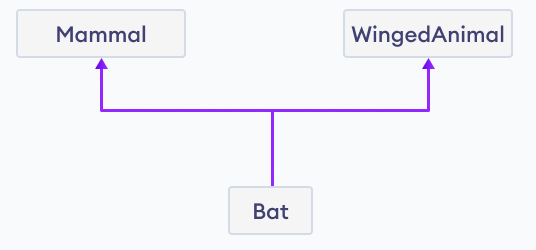

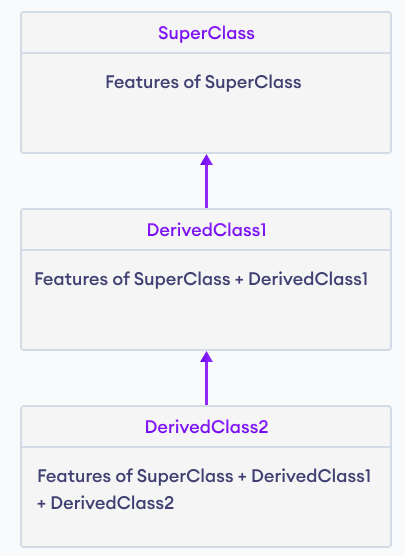

In [4]:
class Mammal:
    def mammal_info(self):
        print("Mammals can give direct birth.")

class WingedAnimal:
    def winged_animal_info(self):
        print("Winged animals can flap.")

class Bat(Mammal, WingedAnimal): # but inherits from 2 super-classes
    pass

# create an object of Bat class
b1 = Bat()

b1.mammal_info()
b1.winged_animal_info()

Mammals can give direct birth.
Winged animals can flap.


### multilevel example

Remember:

If two superclasses have the same method name and the derived class calls that method, Python uses the MRO to search for the right method to call.

In [8]:
class SuperClass:

    def super_method(self):
        print("Super Class method called")
    def shared_func(self):
      print("exec. from super_method")

# define class that derive from SuperClass
class DerivedClass1(SuperClass):
    def derived1_method(self):
        print("Derived class 1 method called")
    def shared_func(self):
      print("exec. from DerivedClass1")

# define class that derive from DerivedClass1
class DerivedClass2(DerivedClass1):

    def derived2_method(self):
        print("Derived class 2 method called")

# create an object of DerivedClass2
d2 = DerivedClass2()

d2.super_method()  # Output: "Super Class method called"

d2.derived1_method()  # Output: "Derived class 1 method called"

d2.derived2_method()  # Output: "Derived class 2 method called"

d2.shared_func() # both superclasses has this method, Example of Method Resolution Order (MRO) in Python

Super Class method called
Derived class 1 method called
Derived class 2 method called
exec. from DerivedClass1


  ## Decorators

  In Python, a decorator is a design pattern that allows you to modify the functionality of a function by wrapping it in another function.

The outer function is called the decorator, which takes the original function as an argument and returns a modified version of it.

In [17]:
# decorator func
def make_pretty(func): # receives fun to decorate as arg
    def inner(a,b):
        print("runs the decorator func")
        print("I got decorated") # adding something before the fun
        func(a,b) #running the func
        print(f"decorator added {a=} {b=}")
    return inner # returns a new func which is our addition + func()

@make_pretty #declare of using make_pretty decorator and send the below code as an arg
def ordinary(a,b):
    print("runs the original func")
    print("I am ordinary")

ordinary("hello","world")  

runs the decorator func
I got decorated
runs the original func
I am ordinary
decorator added a='hello' b='world'


# Python helpers

## * args **kwargs

In [ ]:
# *args **kwargs
def fun_example(a,b,*args,**kwargs):
  print(f"regular input: a = {a} b= {b}\n")
  print(f"args {args}\n")
  print(f"kwargs {kwargs}\n")

fun_example(1,"aaa","h","e","l","l","o",k1 ="hello",k2 = "world")

# also possible to pass dict as a **kwargs with double-star:
my_dict= {"k1":"hello","k2": "world" , "k3" :"nice to train"}
fun_example(1,"aaa",**my_dict)

regular input: a = 1 b= aaa

args ('h', 'e', 'l', 'l', 'o')

kwargs {'k1': 'hello', 'k2': 'world'}

regular input: a = 1 b= aaa

args ()

kwargs {'k1': 'hello', 'k2': 'world', 'k3': 'nice to train'}

